# Avocado Prices

En este ejercicio vamos a resolver el retor de *Avocado Prices* planteado en [https://www.kaggle.com/neuromusic/avocado-prices](https://www.kaggle.com/neuromusic/avocado-prices).

El objetivo es ejecutar una regresión sobre el atributo `
AveragePrice` del conjunto de datos.

Puedes cargar el conjunto de datos descargando desde Kaggle o utilizando la siguiente linea de código:

Para asgurarnos de que los resultados son comparables, vamos a utlizar siempre todos la misma semilla siempre que se generen números aleatorios:
**seed = 43**

Las medidas de calidad que debemos minimizar son las siguientes:

- [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
- [`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

Para calcularlas, debemos dividir el conjunto de datos en conjuntos de entrenamiento y test mediante la función [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de `sklearn`. Usaremos un 70% de datos de entrenamiento y un 30% de datos de test.

Ejecuta ahora las regresiones estudiadas para conseguir el menor error posible.

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('https://drive.upm.es/index.php/s/nDoe2mzkOEMb8Fv/download')
seed = 43

PREPROCESAMIENTO DE LOS DATOS

1. Comprovar que no hay celdas NaN
2. Eliminar toda variable categorica que no influya en el precio
3. Convertir variables categoricas a continuas si influyen en el precio


In [ ]:
data_nan = data.isnull().any(axis=1)
#data_nan #No hay elementos nulos o NaN

In [ ]:
data_clean = data

obj_data_clean = data_clean.select_dtypes(include=['object']).copy()
#obj_data_clean

In [ ]:
Y = data['AveragePrice']
Y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [ ]:
data_clean = data_clean.drop(['Date', 'year', 'AveragePrice', 'Unnamed: 0'], axis = 1) #Borrrar Date, Year, Unnamed0 y AveragePrice

In [ ]:
obj_data_clean = data_clean.select_dtypes(include=['object']).copy()
obj_data_clean

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


In [ ]:
#Desde Scikit podemos substituir los valores categoricos por numéricos
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

def new_category():
  for etiqueta in obj_data_clean:
    data_clean[etiqueta] = lb_make.fit_transform(obj_data_clean[etiqueta])
new_category()

ESTANDARIZAR DATOS - NORMALIZACIÓN 

In [ ]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*1
    dataNorm["region"]=dataset["region"]
    return dataNorm

In [ ]:
X = normalize(data_clean)
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0
1,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0
2,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0
3,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0
4,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,53
18245,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,53
18246,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,53
18247,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,53


DIVISIÓN DE DATOS

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, train_size=0.7, shuffle = True, random_state = seed) #Elige aleatoriamente que filas se concentran en test y train

REGRESIONES

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


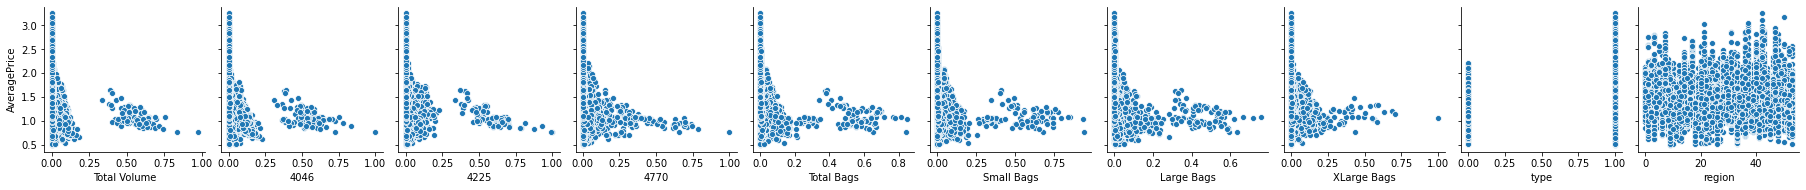

In [ ]:
import seaborn as sns
variables = x_train.columns
sns.pairplot(pd.concat([x_train,y_train], axis=1), x_vars=x_train.columns, y_vars='AveragePrice')

REGRESIÓN LINEAL

In [ ]:
mae = []
mse = []

from itertools import combinations
from sklearn.linear_model import LinearRegression

combinaciones = map(lambda r: combinations(variables, r), range(1, len(variables) + 1))

flatten = lambda l: [item for sublist in l for item in sublist]
combinaciones = flatten(combinaciones)

for c in combinaciones:
    reg = LinearRegression()

    if len(c)<2:
        xs = np.array(x_train.loc[:,c]).reshape(-1, 1)
    else:
        xs = x_train.loc[:,c]
    reg.fit(xs, y_train)
    mae.append(mean_absolute_error(y_train, reg.predict(xs)))
    mse.append(mean_squared_error(y_train, reg.predict(xs)))
    
results_linear = pd.DataFrame({
    'Combinación': combinaciones,
    'MAE': mae,
    'MSE': mse
})

In [ ]:
min_linear = results_linear.min()
min_linear

K NEIGHBOURS

In [ ]:
for i in range(10):
    x_train.iloc[:,i] = np.array(x_train.iloc[:,i]).reshape(-1,1)
    x_test.iloc[:,i] = np.array(x_test.iloc[:,i]).reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import combinations
n_neighbours = [1,2,3]

n_mae = 1
n_mse = 1
best_mae = np.inf
best_mse = np.inf
combo = 1

variable = x_train.columns
combinacion = map(lambda r: combinations(variable, r), range(1, len(variable) + 1))

flatten = lambda l: [item for sublist in l for item in sublist]
combinacion = flatten(combinacion)

for c in combinacion:
  for n in n_neighbours:
    model = KNeighborsRegressor(n)
    model.fit(x_train,y_train)  
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    #print("Vecino:",n)
    #print("Combinacion", c)
    #print("MAE:", mae)
    #print("MSE:", mse)
    if mae<best_mae: #Comparar constantemente mae para obtener el mejor resultado
        best_mae = mae
        mse_mae = mse
        n_mae = n
        
    if mse<best_mse:
        best_mse = mse
        mae_mse = mae
        best_n_mse = n
            
print("Número de vecinos:", n_mae)
print("MAE: ", best_mae)
print("MSE: ", mse_mae)


print("Número de vecinos", n_mse)
print("MAE: ", mae_mse)
print("MSE: ", best_mse)        

Número de vecinos: 3
MAE:  0.12088523592085235
MSE:  0.03193982343987823
Número de vecinos 1
MAE:  0.12266009132420093
MSE:  0.03147084566210046


RPOVES AMB GAUSSIANA I KNN

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = RBF(10, (0.01, 1e2))
alpha_mae = 1
alpha_mse = 1
best_mae = np.inf
best_mse = np.inf

#for c in combinacion:
for i, alpha in zip([0,1], [0.02, 0.05]):
 model = GaussianProcessRegressor(alpha=alpha, kernel=kernel)
 model.fit(x_test, y_test)
 mae = mean_absolute_error(y_test, model.predict(x_test))
 mse = mean_squared_error(y_test, model.predict(x_test))
 if mae<best_mae: #Comparar constantemente mae para obtener el mejor resultado
  best_mae = mae
  mse_mae = mse
  alpha_mae = alpha
        
 if mse<best_mse:
  best_mse = mse
  mae_mse = mae
  best_n_mse = n
  alpha_mse = alpha      
        
print("Mejor MAE: ", best_mae)
print("MSE: ", mse_mae)

print("MAE: ", mae_mse)
print("Mejor MSE: ", best_mse) 

Mejor MAE:  0.1336555130956411
MSE:  0.040019265565535866
MAE:  0.1336555130956411
Mejor MSE:  0.040019265565535866


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import combinations
n_neighbours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

n_mae = 1
n_mse = 1
best_mae = np.inf
best_mse = np.inf

variable = x_train.columns
combinacion = map(lambda r: combinations(variable, r), range(1, len(variable) + 1))

flatten = lambda l: [item for sublist in l for item in sublist]
combinacion = flatten(combinacion)

#for c in combinacion:
for n in n_neighbours:
 model = KNeighborsRegressor(n)
 model.fit(x_train,y_train)  
 mae=mean_absolute_error(y_test, model.predict(x_test))
 mse=mean_squared_error(y_test, model.predict(x_test))
    #print("Vecino:",n)
    #print("Combinacion", c)
    #print("MAE:", mae)
    #print("MSE:", mse)
 if mae<best_mae: #Comparar constantemente mae para obtener el mejor resultado
   best_mae = mae
   mse_mae = mse
   n_mae = n
 if mse<best_mse:
   best_mse = mse
   mae_mse = mae
   best_n_mse = n

print("Vecinos MAE:", n_mae)
print("MAE: ", best_mae)
print("MSE: ", mse_mae)

print("Vecinos MSE:", n_mse)
print("MAE: ", mae_mse)
print("MSE: ", best_mse) 

Vecinos MAE: 3
MAE:  0.12088523592085235
MSE:  0.03193982343987823
Vecinos MSE: 1
MAE:  0.12266009132420093
MSE:  0.03147084566210046
